In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

# Métodos numéricos

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Curso Propedeutico del Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño


Enero - Junio 2025

Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

## 7.2 Método de diferencias finitas para ecuaciones diferenciales parciales

### 7.2.1 Ejemplo: Ecuación de conducción de calor

La ecuación de conducción de calor en régimen transitorio es un ejemplo de una ecuación diferencial parcial de tipo parabólica.

$$\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}$$

Se consideran las siguientes aproximaciones por diferencias finitas:

$$\frac{\partial T}{\partial t} = \frac{T_i^{\theta+1} - T_i^{\theta}}{\Delta t}$$

$$\frac{\partial^2 T}{\partial x^2} = \frac{T_{i-1}^{\theta} -2 T_{i}^{\theta} + T_{i+1}^{\theta}}{(\Delta x)^2}$$

Reescribiendo la ecuación con las aproximaciones por diferencias finitas:

$$\frac{T_i^{\theta+1} - T_i^{\theta}}{\Delta t} = \alpha \frac{T_{i-1}^{\theta} -2 T_{i}^{\theta} + T_{i+1}^{\theta}}{(\Delta x)^2}$$

Reacomodando términos, se obtiene una ecuación explícita que permite calcular $T_i^{\theta+1}$ en función de los valores de temperatura en el tiempo previo, $\theta$:


$$ T_{i}^{\theta+1} = T_{i}^{\theta} + \lambda \left( T_{i-1}^{\theta} - 2 T_{i}^{\theta} + T_{i+1}^{\theta} \right)$$

$$\lambda =  \frac{\alpha \Delta t}{(\Delta x)^2}$$

### 7.2.2 Resolución de un problema de conducción de calor

**Problema:**

Utilice el método explícito para obtener la distribución de temperatura en una varilla larga y delgada de aluminio de longitud $10$ $\mathrm{cm}$.

Las propiedades termofísicas de la barra son las siguientes:

- $k$: $0.49$ [$\mathrm{cal.s^{-1}.cm^{-1}.^{\circ}C^{-1}}$]
- $C$: $0.2174$ [$\mathrm{cal.g^{-1}.^{\circ}C^{-1}}$]
- $\rho$: $2.7$ [$\mathrm{g.cm^{-3}}$]

En $t=0$, la temperatura de la varilla es cero, y las condiciones a la frontera en todo momento son $T(0)=100$ $\mathrm{^{\circ}C}$, y $T(10)=50$ $\mathrm{^{\circ}C}$.

Considere para la resolución del problema $\Delta x = 2$ $\mathrm{cm}$, y $\Delta t = 0.1$ $\mathrm{s}$.

**Solución**

<center>

<img src="figures/images/finiteDifference1DProblem.png" style="height:300px" title="Finite difference stencil">

***Figura 01. Esquema auxiliar para representación del mallado para el problema de conducción de calor.***

</center>

La difusividad térmica se calcula como:

$$\alpha = \frac{k}{\rho C} = \frac{0.49}{(2.7)(0.2174)} = 0.835 \, [\mathrm{cm^2.s^{-1}}]$$

La constante $\lambda$ se calcula como:

$$\lambda = \frac{\alpha \Delta t}{(\Delta x)^2} = \frac{(0.835)(0.1)}{(2)^2} = 0.20875$$

Escritura de las ecuaciones para cada nodo:

$$ T_{1}^{\theta+1} = T_{1}^{\theta} + \lambda \left( 100 - 2 T_{1}^{\theta} + T_{2}^{\theta} \right)$$
$$ T_{2}^{\theta+1} = T_{2}^{\theta} + \lambda \left( T_{1}^{\theta} - 2 T_{2}^{\theta} + T_{3}^{\theta} \right)$$
$$ T_{3}^{\theta+1} = T_{3}^{\theta} + \lambda \left( T_{2}^{\theta} - 2 T_{3}^{\theta} + T_{4}^{\theta} \right)$$
$$ T_{4}^{\theta+1} = T_{4}^{\theta} + \lambda \left( T_{3}^{\theta} - 2 T_{4}^{\theta} + 50 \right)$$

Escritura en forma matricial (con propósito ilustrativo):

$$\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix} \begin{pmatrix} T_1^{\theta+1} \\ T_2^{\theta+1} \\ T_3^{\theta+1} \\ T_4^{\theta+1} \end{pmatrix} = \begin{pmatrix} T_{1}^{\theta} + \lambda \left( 100 - 2 T_{1}^{\theta} + T_{2}^{\theta} \right) \\ T_{2}^{\theta} + \lambda \left( T_{1}^{\theta} - 2 T_{2}^{\theta} + T_{3}^{\theta} \right) \\ T_{3}^{\theta} + \lambda \left( T_{2}^{\theta} - 2 T_{3}^{\theta} + T_{4}^{\theta} \right) \\ T_{4}^{\theta} + \lambda \left( T_{3}^{\theta} - 2 T_{4}^{\theta} + 50 \right) \end{pmatrix}$$

In [2]:
# parámetros de entrada
L = 10 # tamaño del dominio [cm]
n = 4  # número de nodos en el sistema

k = 0.49 # conductividad térmica [cal.s-1.cm-1.C-1]
C = 0.2174 # capacidad calorífica [cal.g-1.C-1]
rho = 2.7 # densidad, [g.cm-3]

Tini = 0 # Temperatura inicial, en todo el dominio
T0 = 100 # Temperatura en x=0
TL = 50 # Temperatura en x=L

dt = 0.1 # paso de tiempo, [s]
ndt = 500
plotEvery = 50

In [3]:
# calculo de coeficientes para construir sistema de ecuaciones
dx = L/(n+1)
alp = k/(rho*C)
lamb = alp*dt/((dx)**2)

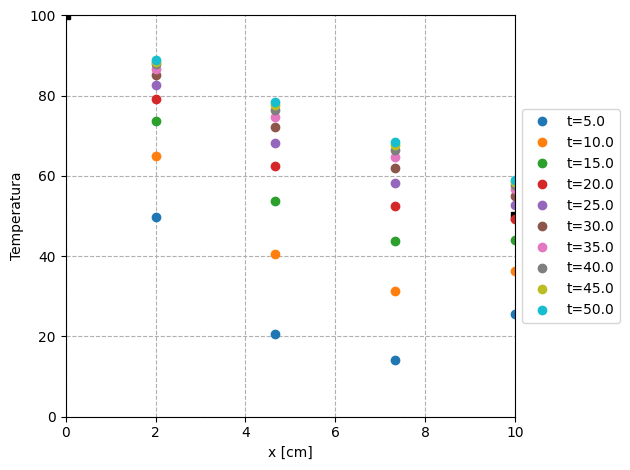

In [4]:
fig, ax = plt.subplots()

x = np.linspace(dx, L, n)
ax.plot(0, T0, ls='', marker='s', color='k')
ax.plot(L, TL, ls='', marker='s', color='k')

# inicialización de variables de temperatura
Told = Tini * np.ones(shape=n)
Tnew = copy(Told)
t = 0

# 
for theta in range(ndt+1):
    Tnew[0] = Told[0] + lamb *(T0 - 2*Told[0] + Told[1])
    for i in range(1,n-1):
        Tnew[i] = Told[i] + lamb * (Told[i-1] - 2*Told[i] + Told[i+1])
    Tnew[-1] = Told[-1] + lamb * (Told[-2] - 2*Told[-1] + TL)
    t += dt
    Told = copy(Tnew)

    if theta % plotEvery == 0 and theta != 0:
        ax.plot(x, Tnew, ls='', marker='o', label=f"t={str(np.round(t,0))}")

ax.set(xlim=(0, L), ylim=(0, max(T0, TL)),
       xlabel='x [cm]', ylabel='Temperatura')
ax.grid(ls='--')
ax.legend(loc='center left', bbox_to_anchor=[1, 0.5])
fig.tight_layout()
plt.show()